In [8]:
import pandas as pd
from scripts.preprocess import preprocess_data
df = pd.read_csv("data/raw/student_data.csv")
train_df, test_df, ohe = preprocess_data(df)

In [9]:
train_df.head()

,student_id,semester,age,online_activity,assignments_completed,grades,forum_participation,churn,activity_trend,assignments_trend,...,low_activity_flag,region_Москва,region_СПб,region_Сибирь,region_Урал,region_Юг,faculty_Информатика,faculty_Лингвистика,faculty_Экономика,faculty_Юриспруденция
4,2,1,19,60.996192,89.474398,3.578805,2,0,0.000000,0.000000,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,2,2,25,97.784173,77.705495,4.272544,3,0,36.787981,-11.768903,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,2,3,21,37.324986,69.561036,4.516927,1,0,-60.459186,-8.144460,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,2,4,32,31.713683,24.863720,2.891694,3,1,-5.611303,-44.697316,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,3,1,24,57.348701,74.866746,2.687026,1,0,0.000000,0.000000,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train = train_df.drop(columns=['churn']), train_df['churn']
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
train_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)

In [17]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

RANDOM_STATE = 42
N_THREADS = 4
N_FOLDS = 5
TARGET_NAME = 'churn'
TIMEOUT = 300

'nlp' extra dependency package 'gensim' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'nltk' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'gensim' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'nltk' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependency package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.


/home/junknewera/workspace/machine-learning/projects/digital-economics-league/students/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/junknewera/workspace/machine-learning/projects/digital-economics-league/students/env/lib/python3.12/site-packages/lightautoml/ml_algo/dl_model.py:42: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
/home/junknewera/workspace/machine-learning/projects/digital-economics-league/students/env/lib/python3.12/site-packages/lightautoml/text/embed.py:22: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
/home/junknewera/workspace/machine-learning/projects/digital-economics-league/students/env/lib/python3.12/site-packages/lightautoml/text/dl_t

In [19]:
import torch
import numpy as np

np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)


In [ ]:
task = Task('binary', metric='auc')
roles = {
    'target': TARGET_NAME,
    'drop': ['student_id']
}

In [22]:
automl = TabularAutoML(
    task = task,
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
)

In [ ]:
out_of_fold_predictions = automl.fit_predict(train_data, roles = roles, verbose = 1)


[16:07:08] Stdout logging level is INFO.
[16:07:08] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[16:07:08] Task: binary

[16:07:08] Start automl preset with listed constraints:
[16:07:08] - time: 300.00 seconds
[16:07:08] - CPU: 4 cores
[16:07:08] - memory: 16 GB

[16:07:08] Train data shape: (204038, 22)

[16:07:11] Layer 1 train process start. Time left 296.53 secs
[16:07:18] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[16:07:26] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.9999833539529112
[16:07:26] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[16:07:26] Time left 282.12 secs

[16:07:31] Selector_LightGBM fitting and predicting completed
[16:07:38] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[16:07:53] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.9999496942525218
[16:07:53] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[16:07:53] Start hyperparameters optimization for Lvl

Optimization Progress:   3%|▎         | 3/101 [00:13<07:10,  4.39s/it, best_trial=0, best_value=1]

[16:08:06] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
[16:08:06] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


[16:08:23] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = 0.9999802989108547
[16:08:23] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed
[16:08:23] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
[16:08:31] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.9999819790806987
[16:08:31] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed
[16:08:31] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 108.31 secs


Optimization Progress:  83%|████████▎ | 84/101 [01:48<00:21,  1.29s/it, best_trial=56, best_value=1]

[16:10:20] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
[16:10:20] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


[16:10:29] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.9999790859352617
[16:10:29] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed
[16:10:29] Time left 99.44 secs

[16:10:29] Layer 1 training completed.

[16:10:29] Blending: optimization starts with equal weights. Score = 0.9999856
[16:10:30] Blending: iteration 0: score = 0.9999858, weights = [0.08607593 0.31904927 0.1982916  0.1982916  0.1982916 ]
[16:10:31] Blending: no improvements for score. Terminated.

[16:10:31] Blending: best score = 0.9999858, best weights = [0.08607593 0.31904927 0.1982916  0.1982916  0.1982916 ]
[16:10:31] Automl preset training completed in 203.07 seconds

[16:10:31] Model description:
Final prediction for new objects (level 0) = 
	 0.08608 * (5 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.31905 * (5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.19829 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.19829 * (5 averaged models Lvl_0_Pipe_1_Mod_2_C

Exception ignored in: <function ResourceTracker.__del__ at 0x7feb895260c0>
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/usr/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7f57954360c0>
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/usr/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7f3517f220c0>
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/reso

In [27]:
test_predictions = automl.predict(test_df)

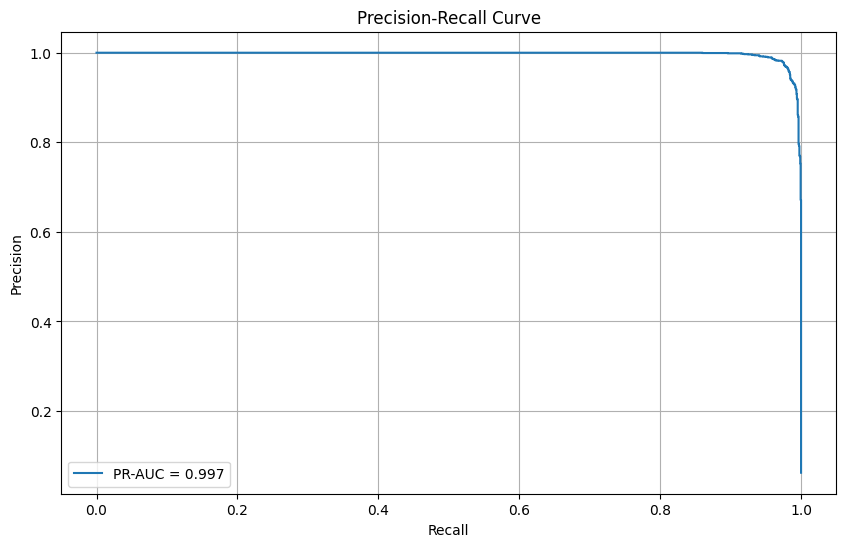

In [46]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(test_df['churn'], test_predictions.data[:, 0])
pr_auc = auc(recalls, precisions)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, label=f'PR-AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

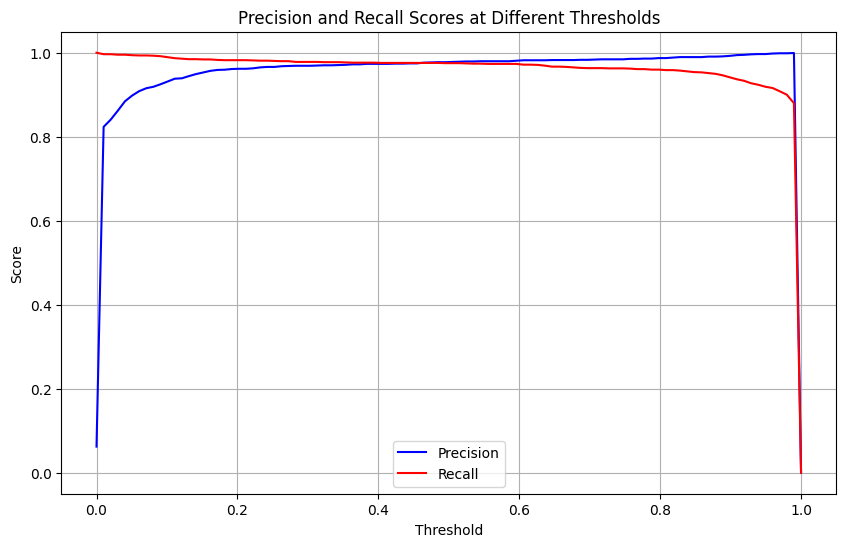

In [47]:
import numpy as np
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

# Get different thresholds and their corresponding precision-recall values
thresholds = np.linspace(0, 1, 100)
precisions_list = []
recalls_list = []

for threshold in thresholds:
    # Convert probabilities to binary predictions based on threshold
    predictions = (test_predictions.data[:, 0] > threshold).astype(int)
    
    # Calculate precision and recall for this threshold
    tp = np.sum((predictions == 1) & (test_df['churn'] == 1))
    fp = np.sum((predictions == 1) & (test_df['churn'] == 0))
    fn = np.sum((predictions == 0) & (test_df['churn'] == 1))
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    precisions_list.append(precision)
    recalls_list.append(recall)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions_list, label='Precision', color='blue')
plt.plot(thresholds, recalls_list, label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall Scores at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()